In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [16]:
# Study data files
ForestFire_month_path = "DataSets_project_2/Number_of_fires_by_month_Data.csv"

# Read the mouse data and the study results
ForestFire_months = pd.read_csv(ForestFire_month_path, delimiter = "\t", encoding= "utf-16")

ForestFire_months.columns = ForestFire_months.iloc[0]
ForestFire_months = ForestFire_months.iloc[1:].reset_index(drop=True)

#ForestFire_months = ForestFire_months.drop(0)

#ForestFire_months = ForestFire_months.set_index('Jurisdiction')

ForestFire_months.head()

,Jurisdiction,Month,Data Qualifier,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Alberta,January,a,1.0,9.0,14.0,8.0,4.0,10.0,1.0,...,14.0,1.0,9.0,2.0,7.0,4.0,4.0,17.0,1.0,NaN
1,Alberta,February,a,5.0,4.0,11.0,12.0,NaN,6.0,NaN,...,3.0,3.0,NaN,4.0,12.0,4.0,NaN,1.0,1.0,NaN
2,Alberta,March,a,8.0,8.0,61.0,29.0,12.0,29.0,1.0,...,32.0,9.0,11.0,32.0,62.0,14.0,19.0,34.0,4.0,NaN
3,Alberta,April,a,26.0,111.0,110.0,52.0,64.0,57.0,26.0,...,123.0,37.0,81.0,277.0,287.0,101.0,97.0,188.0,68.0,NaN
4,Alberta,May,a,114.0,201.0,91.0,242.0,132.0,215.0,56.0,...,456.0,529.0,360.0,505.0,250.0,348.0,454.0,315.0,209.0,NaN


In [17]:
ForestFire_months = ForestFire_months.fillna(0)
ForestFire_months

,Jurisdiction,Month,Data Qualifier,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Alberta,January,a,1.0,9.0,14.0,8.0,4.0,10.0,1.0,...,14.0,1.0,9.0,2.0,7.0,4.0,4.0,17.0,1.0,0.0
1,Alberta,February,a,5.0,4.0,11.0,12.0,0.0,6.0,0.0,...,3.0,3.0,0.0,4.0,12.0,4.0,0.0,1.0,1.0,0.0
2,Alberta,March,a,8.0,8.0,61.0,29.0,12.0,29.0,1.0,...,32.0,9.0,11.0,32.0,62.0,14.0,19.0,34.0,4.0,0.0
3,Alberta,April,a,26.0,111.0,110.0,52.0,64.0,57.0,26.0,...,123.0,37.0,81.0,277.0,287.0,101.0,97.0,188.0,68.0,0.0
4,Alberta,May,a,114.0,201.0,91.0,242.0,132.0,215.0,56.0,...,456.0,529.0,360.0,505.0,250.0,348.0,454.0,315.0,209.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Yukon,October,a,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,Yukon,November,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,Yukon,December,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,Yukon,Unspecified,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
Forest_Fire_Juri = ForestFire_months
Forest_Fire_Juri

,Jurisdiction,Month,Data Qualifier,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,Total
0,Alberta,January,a,1.0,9.0,14.0,8.0,4.0,10.0,1.0,...,14.0,1.0,9.0,2.0,7.0,4.0,4.0,17.0,1.0,212.0
1,Alberta,February,a,5.0,4.0,11.0,12.0,0.0,6.0,0.0,...,3.0,3.0,0.0,4.0,12.0,4.0,0.0,1.0,1.0,138.0
2,Alberta,March,a,8.0,8.0,61.0,29.0,12.0,29.0,1.0,...,32.0,9.0,11.0,32.0,62.0,14.0,19.0,34.0,4.0,585.0
3,Alberta,April,a,26.0,111.0,110.0,52.0,64.0,57.0,26.0,...,123.0,37.0,81.0,277.0,287.0,101.0,97.0,188.0,68.0,3928.0
4,Alberta,May,a,114.0,201.0,91.0,242.0,132.0,215.0,56.0,...,456.0,529.0,360.0,505.0,250.0,348.0,454.0,315.0,209.0,9162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Yukon,October,a,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
156,Yukon,November,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
157,Yukon,December,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
158,Yukon,Unspecified,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [18]:
ForestFire_months.groupby(["Month"]).sum()

C:\Users\nikit\AppData\Local\Temp\ipykernel_25580\252751415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ForestFire_months.groupby(["Month"]).sum()


,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Month,,,,,,,,,,,,,,,,,,,,,
April,620.0,1105.0,526.0,499.0,645.0,538.0,235.0,347.0,996.0,795.0,...,905.0,458.0,299.0,580.0,942.0,314.0,362.0,399.0,436.0,0.0
August,3285.0,2674.0,2807.0,738.0,2907.0,1246.0,1201.0,1583.0,2646.0,1768.0,...,1422.0,1632.0,1204.0,815.0,784.0,1636.0,1440.0,640.0,851.0,0.0
December,5.0,10.0,5.0,5.0,10.0,1.0,4.0,34.0,12.0,37.0,...,1.0,3.0,4.0,11.0,5.0,3.0,6.0,7.0,10.0,0.0
February,8.0,12.0,14.0,29.0,3.0,11.0,4.0,2.0,3.0,3.0,...,5.0,3.0,4.0,6.0,19.0,8.0,0.0,2.0,3.0,0.0
January,1.0,18.0,20.0,13.0,13.0,15.0,7.0,1.0,3.0,6.0,...,17.0,2.0,10.0,2.0,10.0,5.0,5.0,18.0,2.0,0.0
July,2261.0,2078.0,1298.0,1013.0,2078.0,1079.0,1312.0,1410.0,2555.0,1452.0,...,2509.0,1270.0,1350.0,1458.0,980.0,1665.0,1883.0,981.0,750.0,0.0
June,1238.0,1889.0,1807.0,1377.0,1612.0,2896.0,2221.0,1315.0,1293.0,1450.0,...,725.0,873.0,822.0,1772.0,1141.0,608.0,1358.0,745.0,574.0,0.0
March,145.0,87.0,137.0,87.0,85.0,265.0,97.0,11.0,57.0,50.0,...,161.0,36.0,23.0,68.0,96.0,29.0,40.0,86.0,34.0,0.0
May,1241.0,1453.0,1827.0,1587.0,1231.0,1581.0,875.0,877.0,2084.0,1354.0,...,1329.0,1450.0,918.0,1949.0,975.0,755.0,1603.0,926.0,927.0,0.0


In [19]:
ForestFire_months = ForestFire_months.drop(2021.0, axis=1)

In [20]:
ForestFire_months

,Jurisdiction,Month,Data Qualifier,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Alberta,January,a,1.0,9.0,14.0,8.0,4.0,10.0,1.0,...,2.0,14.0,1.0,9.0,2.0,7.0,4.0,4.0,17.0,1.0
1,Alberta,February,a,5.0,4.0,11.0,12.0,0.0,6.0,0.0,...,0.0,3.0,3.0,0.0,4.0,12.0,4.0,0.0,1.0,1.0
2,Alberta,March,a,8.0,8.0,61.0,29.0,12.0,29.0,1.0,...,1.0,32.0,9.0,11.0,32.0,62.0,14.0,19.0,34.0,4.0
3,Alberta,April,a,26.0,111.0,110.0,52.0,64.0,57.0,26.0,...,140.0,123.0,37.0,81.0,277.0,287.0,101.0,97.0,188.0,68.0
4,Alberta,May,a,114.0,201.0,91.0,242.0,132.0,215.0,56.0,...,405.0,456.0,529.0,360.0,505.0,250.0,348.0,454.0,315.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Yukon,October,a,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,Yukon,November,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,Yukon,December,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,Yukon,Unspecified,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
ForestFire_months.loc[:,'Total'] = ForestFire_months.sum(axis=1)

C:\Users\nikit\AppData\Local\Temp\ipykernel_25580\2355960874.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ForestFire_months.loc[:,'Total'] = ForestFire_months.sum(axis=1)


In [22]:
ForestFire_months

,Jurisdiction,Month,Data Qualifier,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,Total
0,Alberta,January,a,1.0,9.0,14.0,8.0,4.0,10.0,1.0,...,14.0,1.0,9.0,2.0,7.0,4.0,4.0,17.0,1.0,212.0
1,Alberta,February,a,5.0,4.0,11.0,12.0,0.0,6.0,0.0,...,3.0,3.0,0.0,4.0,12.0,4.0,0.0,1.0,1.0,138.0
2,Alberta,March,a,8.0,8.0,61.0,29.0,12.0,29.0,1.0,...,32.0,9.0,11.0,32.0,62.0,14.0,19.0,34.0,4.0,585.0
3,Alberta,April,a,26.0,111.0,110.0,52.0,64.0,57.0,26.0,...,123.0,37.0,81.0,277.0,287.0,101.0,97.0,188.0,68.0,3928.0
4,Alberta,May,a,114.0,201.0,91.0,242.0,132.0,215.0,56.0,...,456.0,529.0,360.0,505.0,250.0,348.0,454.0,315.0,209.0,9162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Yukon,October,a,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
156,Yukon,November,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
157,Yukon,December,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
158,Yukon,Unspecified,a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


<Axes: title={'center': 'Total'}, xlabel='Month'>

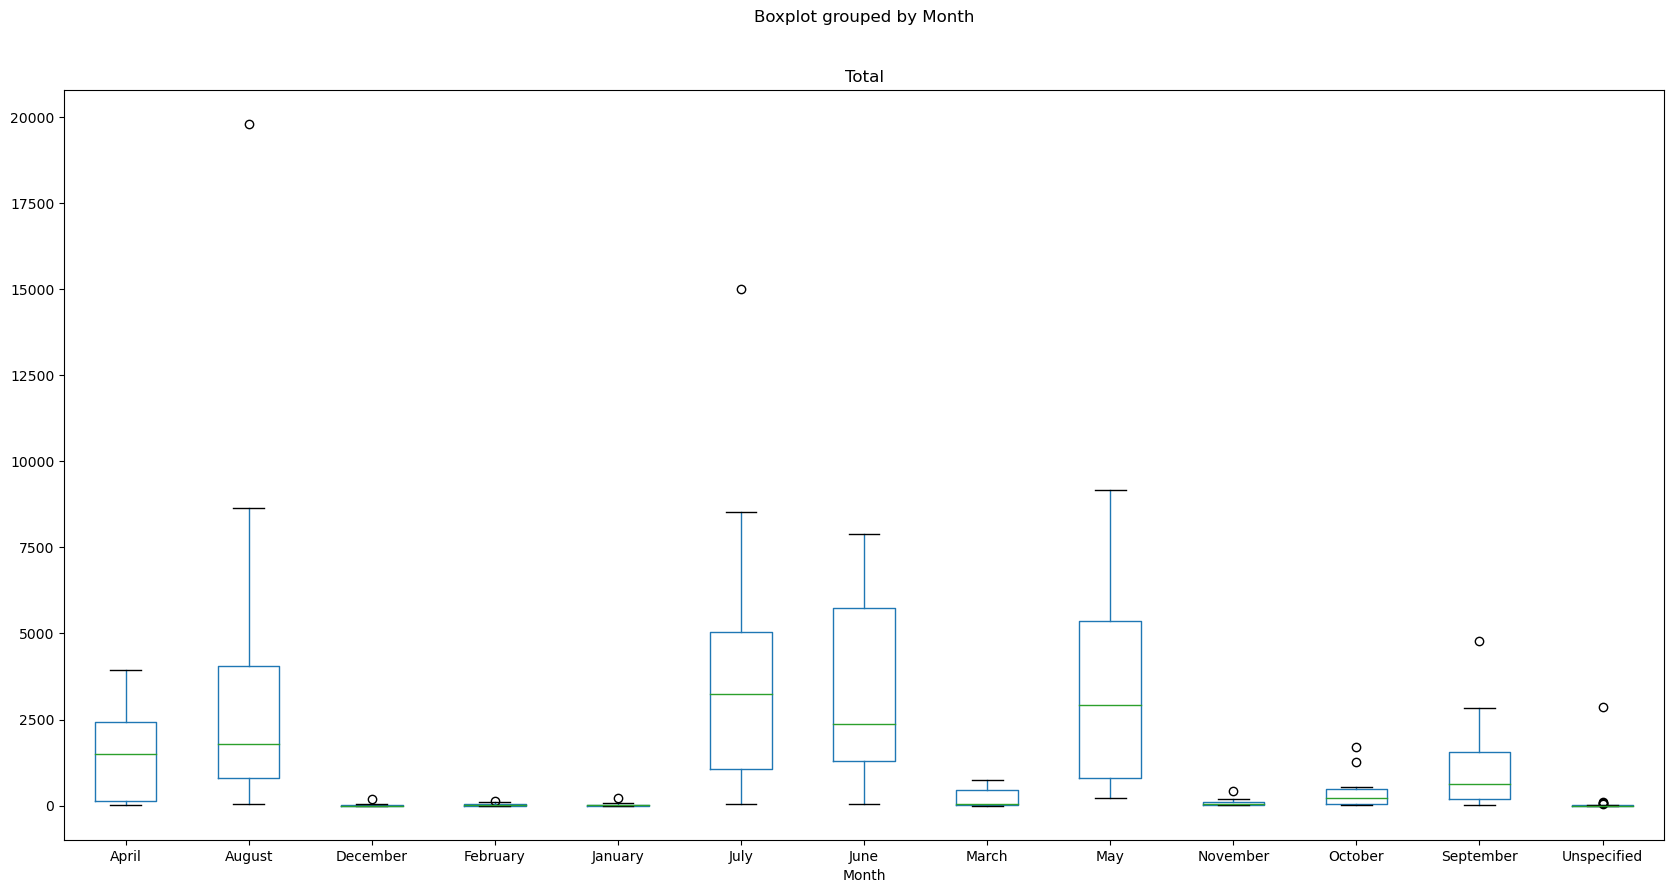

In [25]:
ForestFire_months.boxplot("Total", by="Month", figsize=(20, 10), grid=False)

In [27]:
Extreme_no_fires_df = ForestFire_months[ForestFire_months['Total'] > 10000]

In [28]:
Extreme_no_fires_df

,Jurisdiction,Month,Data Qualifier,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,Total
20,British Columbia,July,a,775.0,296.0,493.0,153.0,1030.0,277.0,452.0,...,417.0,367.0,485.0,538.0,206.0,622.0,684.0,155.0,115.0,14993.0
21,British Columbia,August,a,1563.0,573.0,1803.0,274.0,2118.0,90.0,489.0,...,642.0,999.0,502.0,404.0,325.0,306.0,766.0,126.0,283.0,19802.0


In [32]:
Fire_juri = Forest_Fire_Juri.groupby(["Jurisdiction"]).sum()


C:\Users\nikit\AppData\Local\Temp\ipykernel_25580\2212463777.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fire_juri = Forest_Fire_Juri.groupby(["Jurisdiction"]).sum()


In [33]:
Fire_juri

,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,Total
Jurisdiction,,,,,,,,,,,,,,,,,,,,,
Alberta,1366.0,944.0,1061.0,876.0,931.0,808.0,398.0,463.0,1738.0,1371.0,...,1646.0,1279.0,1506.0,1952.0,1485.0,1330.0,1382.0,1081.0,800.0,40315.0
British Columbia,3255.0,2014.0,3805.0,1497.0,4057.0,1474.0,1360.0,1176.0,2663.0,1198.0,...,1659.0,1879.0,1478.0,1871.0,1075.0,1400.0,2123.0,843.0,684.0,57893.0
Manitoba,562.0,672.0,298.0,239.0,555.0,662.0,424.0,373.0,516.0,613.0,...,499.0,496.0,246.0,463.0,207.0,566.0,483.0,284.0,155.0,14046.0
New Brunswick,377.0,656.0,576.0,430.0,518.0,547.0,367.0,368.0,288.0,607.0,...,338.0,353.0,180.0,222.0,285.0,245.0,285.0,183.0,466.0,10480.0
Newfoundland and Labrador,165.0,115.0,106.0,65.0,129.0,86.0,111.0,78.0,180.0,188.0,...,138.0,71.0,2.0,27.0,18.0,82.0,132.0,99.0,97.0,3150.0
Northwest Territories,236.0,331.0,285.0,473.0,653.0,218.0,350.0,105.0,399.0,172.0,...,289.0,257.0,388.0,257.0,193.0,268.0,63.0,147.0,70.0,7438.0
Nova Scotia,497.0,726.0,296.0,302.0,263.0,407.0,270.0,370.0,346.0,464.0,...,353.0,174.0,172.0,249.0,271.0,177.0,196.0,143.0,178.0,9051.0
Ontario,1612.0,2560.0,960.0,742.0,1079.0,2150.0,1275.0,1646.0,2291.0,1025.0,...,1635.0,582.0,309.0,675.0,657.0,781.0,1339.0,541.0,614.0,35770.0
Parks Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'Total'}, xlabel='Jurisdiction'>

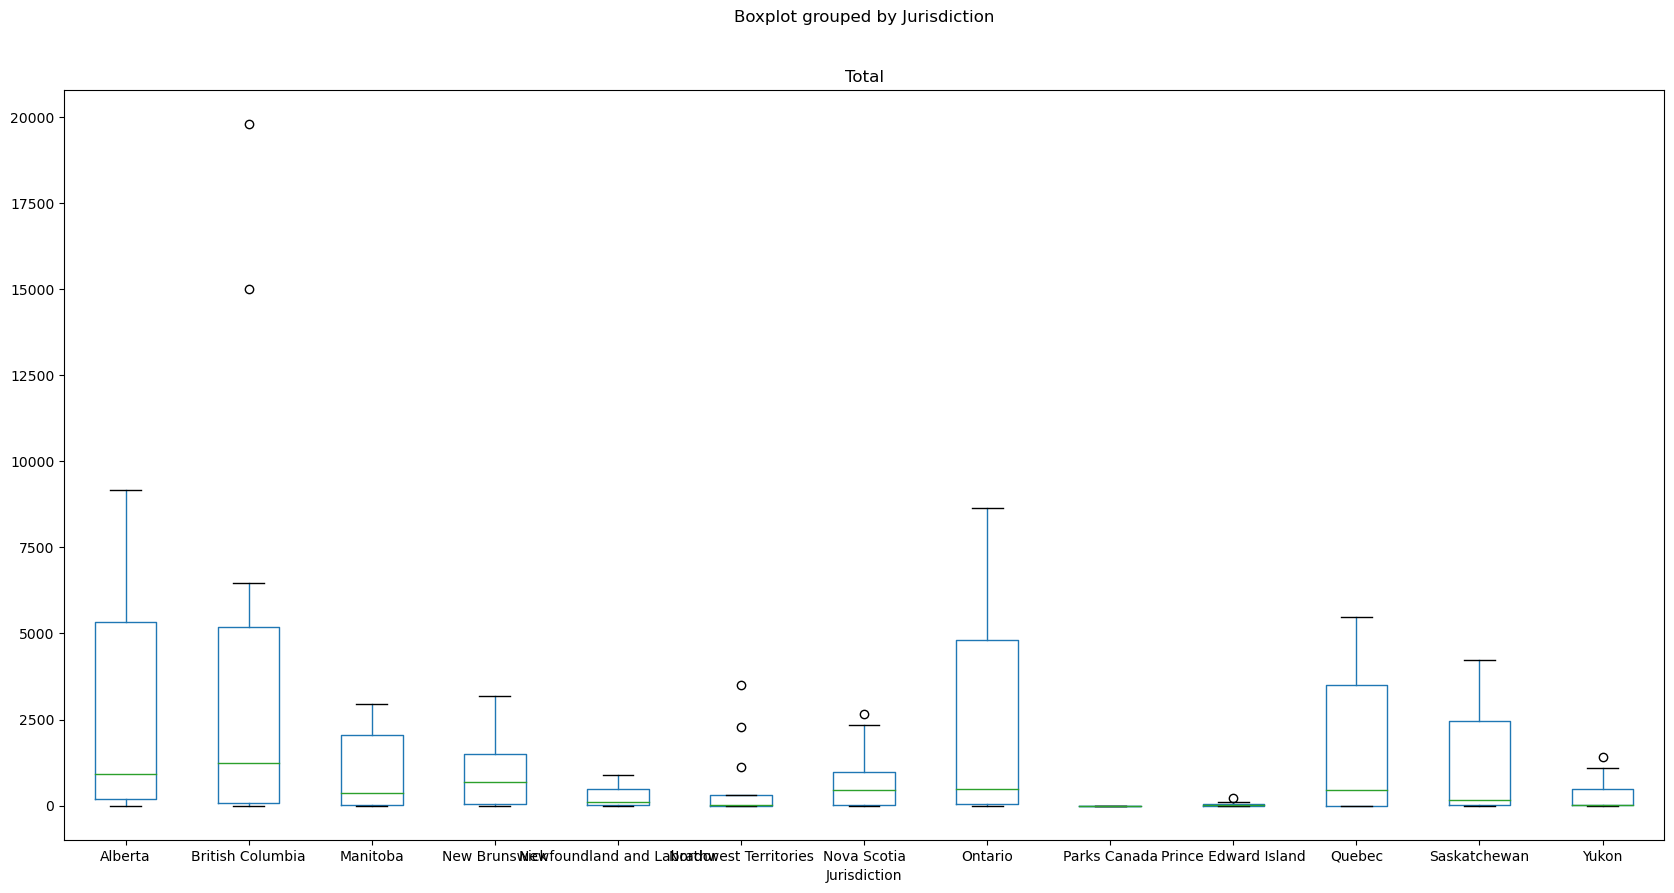

In [35]:
Forest_Fire_Juri.boxplot("Total", by="Jurisdiction", figsize=(20, 10), grid=False)

In [10]:
# Study data files
ForestFire_metadata_path = "DataSets_project_2/No_of_wildfire_per_year_causes.csv"

# Read the mouse data and the study results
ForestFire_years = pd.read_csv(ForestFire_metadata_path, delimiter = "\t", encoding= "utf-16")

ForestFire_years.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Year,Year.1,Year.2,Year.3,Year.4,Year.5,Year.6,...,Year.22,Year.23,Year.24,Year.25,Year.26,Year.27,Year.28,Year.29,Year.30,Year.31
0,Jurisdiction,Cause,Data Qualifier,1990,1991,1992,1993.0,1994,1995,1996.0,...,2012,2013,2014.0,2015,2016.0,2017.0,2018,2019.0,2020.0,2021
1,Alberta,Human activity,a,379,433,398,306.0,361,414,143.0,...,"1,133",892,865.0,"1,033",878.0,834.0,782,728.0,681.0,NaN
2,Alberta,Lightning,a,971,484,631,547.0,551,366,239.0,...,470,337,609.0,829,537.0,448.0,535,318.0,89.0,NaN
3,Alberta,Prescribed burn,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,7,3.0,7,7.0,3.0,2,2.0,2.0,NaN
4,Alberta,Reburn,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
